# Twitter Sentiment Analysis & Classification
<!DOCTYPE html>
<html lang="en">
<body>
    <ul>
        <li>
            <strong>NLP (Natural Language Processing):</strong> A subfield of artificial intelligence that enables computers to understand, interpret, and generate human language. NLP helps machines analyze and process text or speech data for various tasks such as translation, sentiment analysis, or chatbot development.
        </li>
        <li>
            <strong>NLU (Natural Language Understanding):</strong> A subtask of NLP focused on enabling computers to comprehend the meaning and context of human language. NLU involves extracting useful information, understanding relationships between words or phrases, and recognizing the intent of a text or speech input.
        </li>
        <li>
            <strong>Text Classification:</strong> The process of assigning predefined categories or labels to a given text based on its content. Text classification helps in organizing and categorizing text data for applications such as spam filtering, topic identification, or document organization.
        </li>
        <li>
            <strong>Sentiment Analysis:</strong> The process of determining the sentiment, emotion, or opinion expressed in a piece of text. Sentiment analysis identifies whether the text is positive, negative, or neutral in tone and is widely used for social media monitoring, customer feedback analysis, and market research.
        </li>
    </ul>
</body>
</html>


![Sentiment Analysis](https://www.nitorinfotech.com/wp-content/uploads/2022/06/Sentiment-Analysis-Process_-Nitor-Infotech.jpg)

Let's get started with code without furthur ado.

##  Importing Dependencies
   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
import random

from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.12.0


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devangshumitra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<!DOCTYPE html>
<html lang="en">

<body>
    <ul>
        <li>
            <strong>import tensorflow as tf:</strong> Imports TensorFlow, an open-source machine learning library used for various tasks, including NLP and image recognition.
        </li>
        <li>
            <strong>import matplotlib.pyplot as plt:</strong> Imports the Pyplot module from the Matplotlib library, used for creating visualizations and plots.
        </li>
        <li>
            <strong>import pandas as pd:</strong> Imports the Pandas library, used for data manipulation and analysis. The "pd" alias is a convention.
        </li>
        <li>
            <strong>import numpy as np:</strong> Imports the NumPy library, used for numerical operations and handling arrays. The "np" alias is a convention.
        </li>
        <li>
            <strong>import nltk:</strong> Imports the NLTK library, which is a powerful library for working with human language data (text).
        </li>
        <li>
            <strong>nltk.download('stopwords'):</strong> Downloads the "stopwords" resource, which is a collection of common words that don't carry much meaning and can be removed during text preprocessing.
        </li>
        <li>
            <strong>from nltk.corpus import stopwords:</strong> Imports the "stopwords" module from the NLTK corpus package.
        </li>
        <li>
            <strong>from nltk.stem import SnowballStemmer:</strong> Imports the "SnowballStemmer" class from the NLTK stem package. This is used to reduce words to their root form (stemming).
        </li>
        <li>
            <strong>from sklearn.model_selection import train_test_split:</strong> Imports the "train_test_split" function from scikit-learn's model selection module, used to split datasets into training and testing subsets.
        </li>
        <li>
            <strong>from sklearn.preprocessing import LabelEncoder:</strong> Imports the "LabelEncoder" class from scikit-learn's preprocessing module, which is used to encode categorical labels as integers.
        </li>
        <li>
            <strong>import re:</strong> Imports the regular expression (regex) module, which is used for working with and manipulating text using patterns.
        </li>
        <li>
            <strong>import random:</strong> Imports the random module, which contains functions for generating random numbers.
        </li>
        <li>
            <strong>print("Tensorflow Version",tf.__version__):</strong> Prints the version of the TensorFlow library being used in the script. This can be useful for debugging purposes or ensuring compatibility with other code.
        </li>
        <li>
            <strong>from wordcloud import WordCloud:</strong> This line of code imports the "WordCloud" class from the "wordcloud" library. The WordCloud class is used to generate word cloud visualizations, which are graphical representations of text data where the size of each word represents its frequency or importance in the text. This makes it easy to visualize and identify the most frequent or important words in a given text dataset.
        </li>
        <li>
            <strong>from keras.preprocessing.text import Tokenizer:</strong> This line of code imports the Tokenizer class from the Keras library's preprocessing module. The Tokenizer class provides methods for converting text data into sequences of integers, which can be used as input to deep learning models. The Tokenizer class is particularly useful when working with text data in natural language processing tasks, such as text classification or sentiment analysis.
        </li>
         <li>
            <strong>from keras.utils import pad_sequences:</strong> This line of code imports the pad_sequences function from the Keras library's utils module. The pad_sequences function is used to ensure that all input sequences have the same length by either truncating sequences that are too long or padding sequences that are too short with zeros. This is important because deep learning models, such as recurrent neural networks (RNNs) and convolutional neural networks (CNNs), require fixed-length input sequences to work effectively.
        </li>
    </ul>
    <p>Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. Here are the layers used in this code:</p>
    <ul>
        <li><b>Input:</b> This layer is used to define the shape of the input data. In this case, the input is a sequence of words.</li>
        <li><b>Conv1D:</b> This layer applies a 1-dimensional convolutional filter to the input. It can be used to learn features that are local to the input sequence.</li>
        <li><b>Bidirectional:</b> This layer applies two LSTM layers to the input, one going forward in time and the other going backward in time. This allows the model to capture both past and future context of the input sequence.</li>
        <li><b>LSTM:</b> This layer applies a Long Short-Term Memory (LSTM) cell to the input. LSTM cells are a type of recurrent neural network (RNN) cell that can maintain a memory of previous inputs and selectively forget or remember them.</li>
        <li><b>Dense:</b> This layer applies a linear transformation to the input data and outputs a vector of a specified size.</li>
        <li><b>Dropout:</b> This layer applies dropout regularization to the input. Dropout randomly drops out a fraction of the input units during training to prevent overfitting.</li>
        <li><b>SpatialDropout1D:</b> This layer applies dropout regularization to the input. SpatialDropout1D drops out entire 1D feature maps instead of individual units, which can be more effective in capturing correlations between feature maps.</li>
        <li><b>ModelCheckpoint:</b> This callback is used to save the model weights after each epoch of training. It can be used to resume training at a later time or to choose the best model based on its performance on a validation set.</li>
    </ul>
    <p>By stacking these layers together, we can create a deep neural network that can learn complex patterns in the input sequence and make accurate predictions on new data.</p>
    <div>
<ul>
<li><b>Adam optimizer:</b> Adam is an optimization algorithm that can be used for stochastic gradient descent. It is a popular choice for deep learning models because it is computationally efficient and often leads to faster convergence than other optimization algorithms.</li>
<li><b>ReduceLROnPlateau callback:</b> This callback reduces the learning rate when the validation loss has stopped improving. This can be useful for preventing the model from getting stuck in local minima and for improving the generalization ability of the model.</li>
</ul>
</div>
 
<div>
<p>The <strong>itertools</strong> module provides various functions that work on iterators to produce complex iterators. It is used here to produce a confusion matrix, which is a table that shows the predicted and actual classifications of a model on a set of data. The <strong>confusion_matrix()</strong> function from the <strong>sklearn.metrics</strong> module takes two parameters: the actual values of the target variable (in this case, sentiment), and the predicted values of the target variable. The <strong>classification_report()</strong> function also from the <strong>sklearn.metrics</strong> module provides a summary of the precision, recall, f1-score, and support for each class in the classification report. The <strong>accuracy_score()</strong> function from the <strong>sklearn.metrics</strong> module calculates the accuracy of the model.</p>
</div>
</body>
</html>


#  Dataset Preprocessing
In this notebook, I am using **Sentiment-140** from Kaggle. It contains a labels data of 1.6 Million Tweets and I find it a good amount of data to train our model.

In [5]:
df = pd.read_csv('/Users/devangshumitra/Desktop/UTD MSBA/4. Projects/2. NLP Sentiment Analysis/Twitter.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<!DOCTYPE html>
<html lang="en">
<body>
    <ul>
        <li>
            <strong>df = pd.read_csv(...):</strong> Reads a CSV file located at the specified file path, using the Pandas library. It assigns the resulting data to the variable "df" (short for DataFrame, a Pandas data structure).
            <ul>
                <li>
                    <strong>encoding = 'latin':</strong> Specifies the encoding to use while reading the CSV file. In this case, it's set to 'latin', which is also known as 'ISO-8859-1'.
                </li>
                <li>
                    <strong>header=None:</strong> Indicates that the CSV file doesn't have a header row. Pandas will assign default column names (integer values).
                </li>
            </ul>
        </li>
        <li>
            <strong>df.head():</strong> Displays the first five rows of the DataFrame "df". This is a common method used to get an overview of the data after reading it into a DataFrame.
        </li>
    </ul>
</body>
</html>


You can see the columns have numbers as names. Lets rename them for this model

In [6]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<!DOCTYPE html>
<html lang="en">
<body>
    <ul>
        <li>
            <strong>df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']:</strong> Assigns new column names to the DataFrame "df". This step is particularly useful when the original data does not have column names, or when you want to rename the columns for better clarity.
            <ul>
                <li>
                    <strong>sentiment:</strong> Represents the sentiment label of the tweet.
                </li>
                <li>
                    <strong>id:</strong> Represents the unique identifier of the tweet.
                </li>
                <li>
                    <strong>date:</strong> Represents the date and time when the tweet was posted.
                </li>
                <li>
                    <strong>query:</strong> Represents the query used to collect the tweet.
                </li>
                <li>
                    <strong>user_id:</strong> Represents the unique identifier of the user who posted the tweet.
                </li>
                <li>
                    <strong>text:</strong> Represents the text content of the tweet.
                </li>
            </ul>
        </li>
        <li>
            <strong>df.head():</strong> Displays the first five rows of the DataFrame "df". This method is commonly used to get an overview of the data after renaming the columns.
        </li>
    </ul>
</body>
</html>


We are going to train only on text to classify its sentiment. So we can drop the rest of the columns.

In [7]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


<!DOCTYPE html>
<html lang="en">
<body>
    <ul>
        <li>
            <strong>df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']:</strong> Assigns new column names to the DataFrame "df". This step is particularly useful when the original data does not have column names, or when you want to rename the columns for better clarity.
            <ul>
                <li>
                    <strong>sentiment:</strong> Represents the sentiment label of the tweet.
                </li>
                <li>
                    <strong>id:</strong> Represents the unique identifier of the tweet.
                </li>
                <li>
                    <strong>date:</strong> Represents the date and time when the tweet was posted.
                </li>
                <li>
                    <strong>query:</strong> Represents the query used to collect the tweet.
                </li>
                <li>
                    <strong>user_id:</strong> Represents the unique identifier of the user who posted the tweet.
                </li>
                <li>
                    <strong>text:</strong> Represents the text content of the tweet.
                </li>
            </ul>
        </li>
        <li>
            <strong>df.head():</strong> Displays the first five rows of the DataFrame "df". This method is commonly used to get an overview of the data after renaming the columns.
        </li>
    </ul>
</body>
</html>


Check the unique values in the sentiment column

In [8]:
label_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return label_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


<!DOCTYPE html>
<html lang="en">
<body>
    <ul>
        <li>
            <strong>label_sentiment = {0:"Negative", 4:"Positive"}:</strong> Creates a dictionary called "label_sentiment" that maps the integer sentiment labels (0 and 4) to their corresponding string values ("Negative" and "Positive").
        </li>
        <li>
            <strong>def label_decoder(label):</strong> Defines a function called "label_decoder" that takes a single argument, "label".
            <ul>
                <li>
                    <strong>return label_sentiment[label]:</strong> Returns the string value corresponding to the given "label" using the "label_sentiment" dictionary.
                </li>
            </ul>
        </li>
        <li>
            <strong>df.sentiment = df.sentiment.apply(lambda x: label_decoder(x)):</strong> Applies the "label_decoder" function to each element in the "sentiment" column of the DataFrame "df" using the "apply()" method. This replaces the original numeric sentiment labels with their string counterparts ("Negative" or "Positive").
        </li>
        <li>
            <strong>df.head():</strong> Displays the first five rows of the DataFrame "df" after updating the "sentiment" column. This method is commonly used to verify that the sentiment labels have been transformed as expected.
        </li>
    </ul>
</body>
</html>


Text(0.5, 1.0, 'Sentiment Data Distribution')

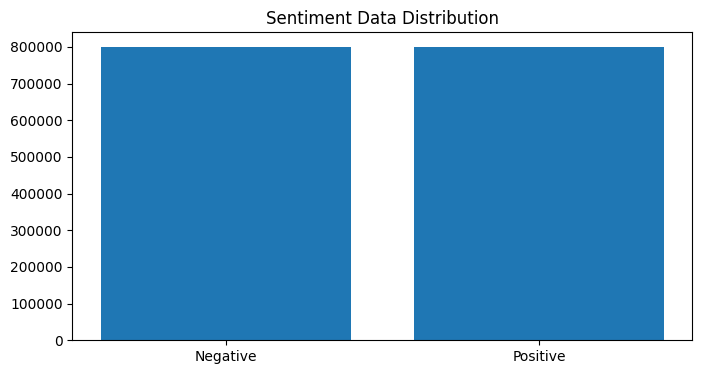

In [9]:
val_count = df.sentiment.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

<!DOCTYPE html>
<html lang="en">
<body>
    <ul>
        <li>
            <strong>val_count = df.sentiment.value_counts():</strong> Calculates the count of each unique value in the "sentiment" column of the DataFrame "df" using the "value_counts()" method. The result is stored in the variable "val_count".
        </li>
        <li>
            <strong>plt.figure(figsize=(8,4)):</strong> Creates a new Matplotlib figure with the specified dimensions (width=8, height=4) using the "figure()" function.
        </li>
        <li>
            <strong>plt.bar(val_count.index, val_count.values):</strong> Creates a bar plot with the indices of "val_count" on the x-axis and the values of "val_count" on the y-axis using the "bar()" function. This plot visualizes the distribution of sentiment data.
        </li>
        <li>
            <strong>plt.title("Sentiment Data Distribution"):</strong> Sets the title of the bar plot to "Sentiment Data Distribution" using the "title()" function.
        </li>
    </ul>
</body>
</html>


**It's good dataset without any skewness.**

**Let's explore:**

In [10]:
random_index_list = [random.randint(1,len(df.text)) for i in range(10)]
df.loc[random_index_list,:].head(10)

,sentiment,text
1354928,Positive,@BarryH2k Well..im still glowing like an ommpa...
1301718,Positive,Sipping some Organic Chai tea and taking the m...
210251,Negative,Out of the 3 i decided to vote for in the end ...
515003,Negative,@RedDusk_Perth hoorah! i ahave been so busy an...
1227880,Positive,the best thing about thin lizzy's live and dan...
1540127,Positive,@MarketingUK that's a good (healthier) idea! D...
418354,Negative,kiddos with fever
1587099,Positive,@justakoff @JaniRose too much. Sam!!! What abo...
299179,Negative,@onehalfoffifty FALA COMIGO. cold weather make...
1393908,Positive,it 3pm.. making myself a breakfast.. exactly.....


<!DOCTYPE html>
<html lang="en">
<body>
    <ul>
        <li>
            <strong>random_index_list = [random.randint(1,len(df.text)) for i in range(10)]:</strong> Generates a list of 10 random integer values between 1 and the length of the "text" column in the DataFrame "df" using a list comprehension and the "randint()" function from the random module. This list is assigned to the variable "random_index_list".
        </li>
        <li>
            <strong>df.loc[random_index_list,:].head(10):</strong> Selects the rows of the DataFrame "df" with the indices specified in "random_index_list" using the "loc[]" function. The ":" in the second part of the "loc[]" function indicates that all columns should be included. The "head(10)" function is then used to display the first 10 rows of the selected data. In this case, it will display all the rows since only 10 random rows were selected.
        </li>
    </ul>
</body>
</html>


**We have noisy in text because in general we use lot of punctuations and other words without any contextual meaning. This has no value to the model we are training. So we get rid of them.**

# Text Preprocessing
Tweet texts often consists of other user mentions, hyperlink texts, emoticons, and punctuations. In order to use them for learning using a Language Model, we cannot use these texts for training the model. So we have to clean the text data using various preprocessing and cleansing methods. 

<!DOCTYPE html>
<html lang="en">
<body>
    <p>Text preprocessing is an essential step in Natural Language Processing and Machine Learning that involves cleaning and transforming raw text data into a structured format that can be easily understood and analyzed by algorithms.</p>
    <ul>
        <li>
            <strong>Lowercasing:</strong> Converts all text to lowercase, which helps in standardizing and reducing the dimensionality of the text data.
        </li>
        <li>
            <strong>Tokenization:</strong> Splits the text into individual words or tokens, making it easier to analyze and process the text.
        </li>
        <li>
            <strong>Stopword Removal:</strong> Removes common words (like 'a', 'an', 'the') that do not carry significant meaning and might add noise to the analysis.
        </li>
        <li>
            <strong>Stemming/Lemmatization:</strong> Reduces words to their base or root form, which helps in grouping similar words together and reducing the overall vocabulary size.
        </li>
        <li>
            <strong>Removing special characters and punctuation:</strong> Eliminates non-alphanumeric characters, which can help in reducing noise and improving the quality of the text data.
        </li>
    </ul>
</body>
</html>

Let's continue


<!DOCTYPE html>
<html lang="en">
<body>
    <h1>Stemming and Lemmatization</h1>
    <p>Stemming and lemmatization are text preprocessing techniques used in Natural Language Processing to reduce words to their base or root form. This helps in grouping similar words together, reducing the overall vocabulary size and improving text analysis.</p>
    <ul>
        <li>
            <strong>Stemming:</strong> A technique that reduces words to their root or base form by removing the suffixes from the words. It's a crude method that often results in incorrect root forms but is computationally faster. For example, the words 'running', 'runner', and 'ran' might be reduced to the stem 'run'.
        </li>
        <li>
            <strong>Lemmatization:</strong> A more sophisticated technique that reduces words to their base or root form by considering the morphological analysis and the context of the word in the sentence. It is slower than stemming but provides more accurate results. For example, the word 'better' is lemmatized to 'good'.
        </li>
    </ul>
</body>
</html>

![Stemming and Lematization](https://miro.medium.com/v2/resize:fit:1196/1*zfGwHSTGqbaFwb_O8KQrnQ.png)

### Hyperlinks and Mentions
Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.

- Twitter User Mentions - Eg. @arunrk7, @andrewng
- Hyperlinks - Eg. https://keras.io, https://tensorflow.org

### Stopwords
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...
![Stopwords English](https://www.mediavine.com/wp-content/uploads/2020/04/stop-words-infographic-2.jpg)

**NLTK** is a python library which got functions to perform text processing task for NLP.



In [11]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

<!DOCTYPE html>
<html lang="en">
<body>
    <ul>
        <li>
            <strong>stop_words = stopwords.words('english'):</strong> Retrieves a list of English stopwords (common words like 'a', 'an', 'the') using the "stopwords.words()" function from the NLTK library. The list of stopwords is assigned to the variable "stop_words".
        </li>
        <li>
            <strong>stemmer = SnowballStemmer('english'):</strong> Initializes an instance of the SnowballStemmer class for the English language, which is a stemming algorithm provided by the NLTK library. The SnowballStemmer object is assigned to the variable "stemmer".
        </li>
        <li>
            <strong>text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+":</strong> Defines a regular expression pattern for text cleaning. This pattern matches the following:
            <ul>
                <li>User mentions starting with "@" followed by any non-space characters</li>
                <li>URLs starting with "https://" or "http://" followed by any non-space characters</li>
                <li>Any character that is not an uppercase or lowercase letter, digit, or space</li>
            </ul>
            The pattern is assigned to the variable "text_cleaning_re".
        </li>
    </ul>
</body>
</html>


In [12]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code defines a function called "preprocess" that takes two arguments, "text" and an optional "stem" argument with a default value of "False". The function cleans and preprocesses the input text.</p>
    <ul>
        <li>
            <strong>text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip():</strong> This line of code performs the following operations:
            <ul>
                <li>Converts the input "text" to a lowercase string using "str(text).lower()"</li>
                <li>Applies the regular expression pattern "text_cleaning_re" to remove unwanted characters and replace them with a space using "re.sub()"</li>
                <li>Removes any leading and trailing whitespace using the "strip()" function</li>
            </ul>
        </li>
        <li>
            <strong>tokens = []:</strong> Initializes an empty list called "tokens" to store the preprocessed words (tokens) from the input text.
        </li>
        <li>
            <strong>for token in text.split():</strong> Splits the cleaned text into individual words (tokens) using the "split()" function and iterates through each token.
        </li>
        <li>
            <strong>if token not in stop_words:</strong> Checks if the current token is not a stopword. If it's not a stopword, the following code block will be executed.
        </li>
        <li>
            <strong>if stem:</strong> Checks if the "stem" argument is set to "True". If it is, the following code block will be executed.
            <ul>
                <li>
                    <strong>tokens.append(stemmer.stem(token)):</strong> Applies the stemming algorithm using the "stemmer" object created earlier and appends the stemmed token to the "tokens" list.
                </li>
            </ul>
            <strong>else:</strong> If the "stem" argument is set to "False", the following code block will be executed.
            <ul>
                <li>
                    <strong>tokens.append(token):</strong> Appends the unmodified token to the "tokens" list.
                </li>
            </ul>
        </li>
        <li>
            <strong>return " ".join(tokens):</strong> Joins the preprocessed tokens in the "tokens" list back into a single string, separated by spaces, and returns the final preprocessed text.
        </li>
    </ul>
</body>
</html>


In [13]:
df.text = df.text.apply(lambda x: preprocess(x))

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code applies the "preprocess" function to each element in the "text" column of the DataFrame "df".</p>
    <ul>
        <li>
            <strong>df.text = df.text.apply(lambda x: preprocess(x)):</strong> The "apply()" function is used to apply a function to each element in a DataFrame column. In this case, it applies the "preprocess" function to each element in the "text" column of the DataFrame "df". The "lambda x: preprocess(x)" part defines an anonymous function (lambda) that takes a single input "x" and calls the "preprocess" function with that input. The result is a new column with the preprocessed text, which replaces the original "text" column in the DataFrame "df".
        </li>
    </ul>
</body>
</html>


### Word Cloud
<!DOCTYPE html>
<html lang="en">
<body>
    <p>A word cloud, also known as a tag cloud or text cloud, is a visual representation of text data. It displays words from a given text or dataset in a way that the size of each word represents its frequency or importance within the data. This means that the most frequent or important words appear larger than the less frequent ones.</p>
    <p>Word clouds can help users easily identify the most prominent words or themes in a text, as well as provide a visually appealing way to display textual data. They are often used in text analysis, natural language processing, and data visualization projects.</p>
</body>
</html>

### Positive Words

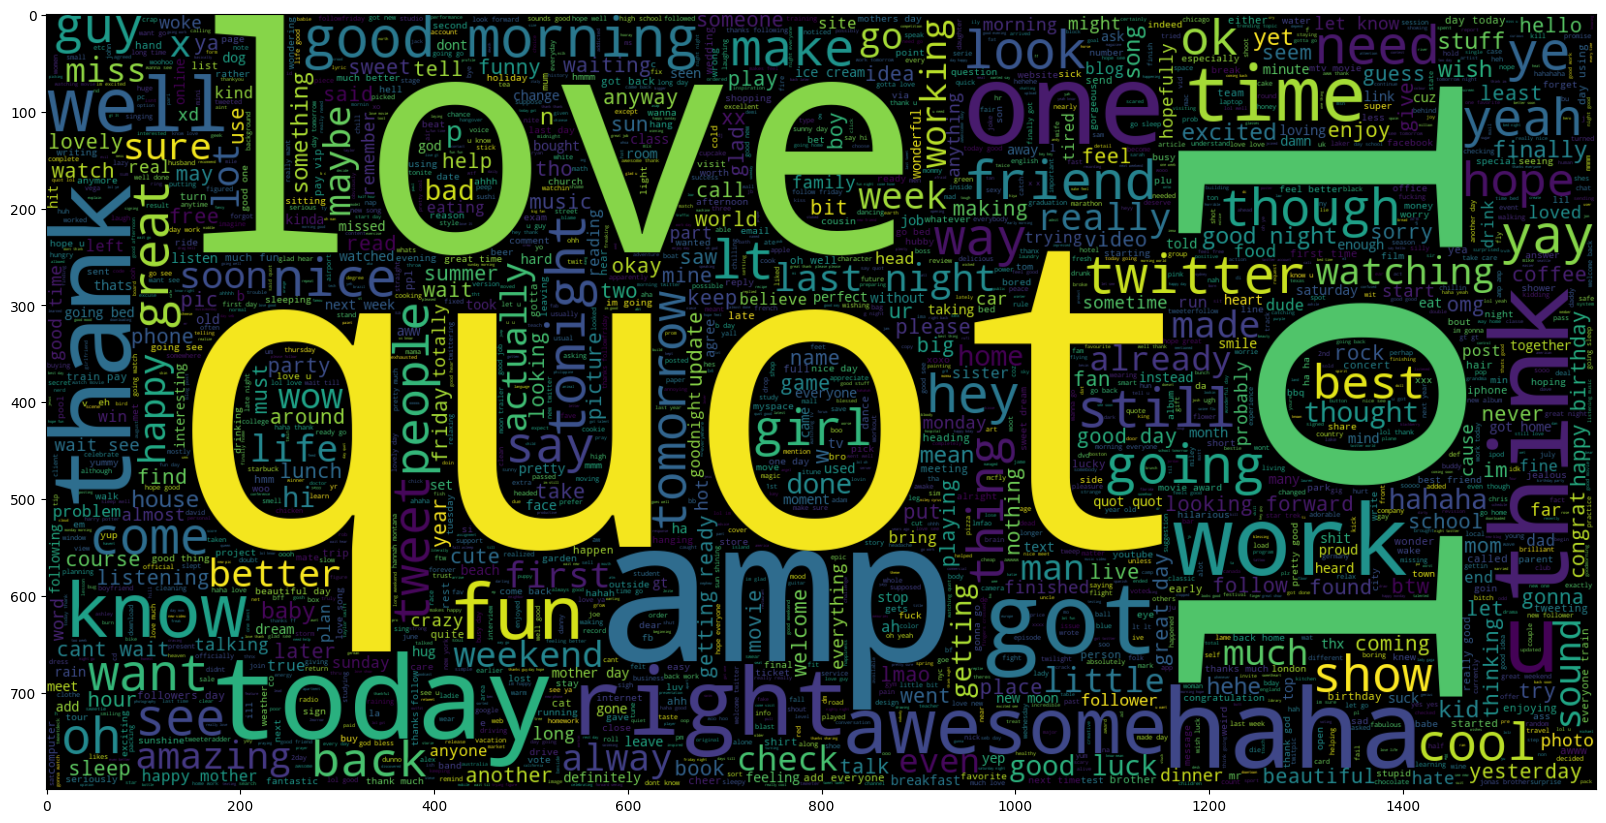

In [15]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code creates a word cloud visualization of the most frequent words in the positive sentiment texts in the DataFrame "df".</p>
    <ul>
        <li>
            <strong>plt.figure(figsize = (20,20)):</strong> Creates a new matplotlib figure with a custom size of 20 inches by 20 inches.
        </li>
        <li>
            <strong>wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text)):</strong> Generates a WordCloud object with the following configurations:
            <ul>
                <li>max_words: The maximum number of words to display in the word cloud, set to 2000.</li>
                <li>width: The width of the word cloud image, set to 1600 pixels.</li>
                <li>height: The height of the word cloud image, set to 800 pixels.</li>
            </ul>
            The "generate()" method is then called on the WordCloud object, and it takes a single string as input, which is created by joining all the positive sentiment texts from the "text" column in the DataFrame "df".
        </li>
        <li>
            <strong>plt.imshow(wc , interpolation = 'bilinear'):</strong> Displays the generated word cloud image using the "imshow()" function from the matplotlib library. The "interpolation" parameter is set to 'bilinear' to improve the visual quality of the word cloud image.
        </li>
    </ul>
</body>
</html>

### Negative Words

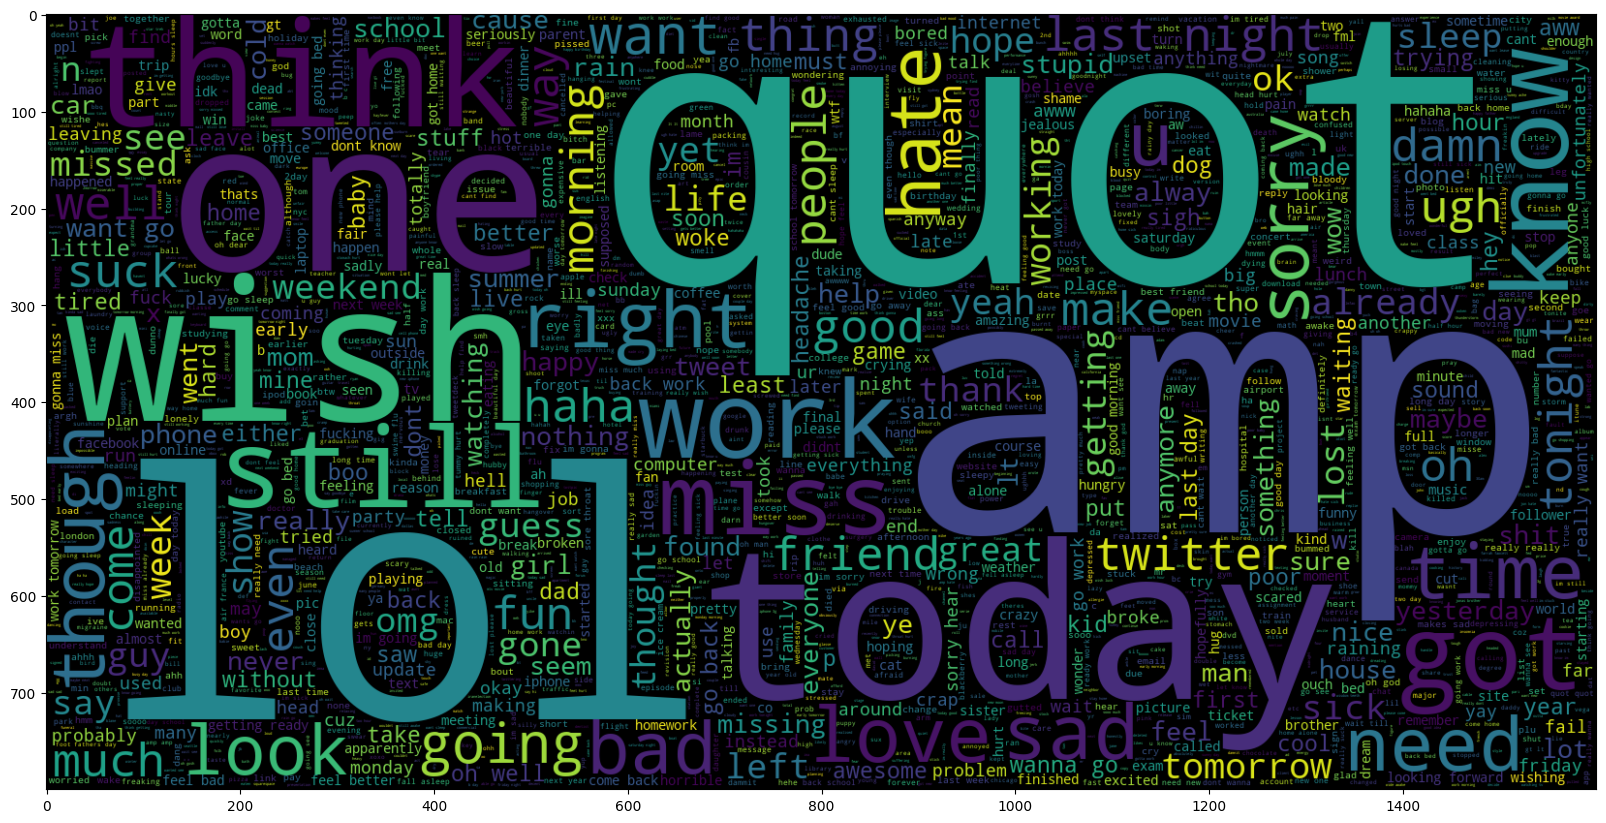

In [16]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code creates a word cloud visualization of the most frequent words in the negative sentiment texts in the DataFrame "df".</p>
    <ul>
        <li>
            <strong>plt.figure(figsize = (20,20)):</strong> Creates a new matplotlib figure with a custom size of 20 inches by 20 inches.
        </li>
        <li>
            <strong>wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text)):</strong> Generates a WordCloud object with the following configurations:
            <ul>
                <li>max_words: The maximum number of words to display in the word cloud, set to 2000.</li>
                <li>width: The width of the word cloud image, set to 1600 pixels.</li>
                <li>height: The height of the word cloud image, set to 800 pixels.</li>
            </ul>
            The "generate()" method is then called on the WordCloud object, and it takes a single string as input, which is created by joining all the negative sentiment texts from the "text" column in the DataFrame "df".
        </li>
        <li>
            <strong>plt.imshow(wc , interpolation = 'bilinear'):</strong> Displays the generated word cloud image using the "imshow()" function from the matplotlib library. The "interpolation" parameter is set to 'bilinear' to improve the visual quality of the word cloud image.
        </li>
    </ul>
</body>
</html>


## Train and Test Split

In [17]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code defines three constant variables that will be used in the later stages of the text processing and machine learning pipeline.</p>
    <ul>
        <li>
            <strong>TRAIN_SIZE = 0.8:</strong> This constant is used to specify the percentage of the dataset that will be used for training during the train-test split. In this case, 80% of the data will be used for training, while the remaining 20% will be used for testing.
        </li>
        <li>
            <strong>MAX_NB_WORDS = 100000:</strong> This constant is used to specify the maximum number of unique words to consider when tokenizing the text data. This helps limit the size of the vocabulary, which can be useful in reducing the computational complexity of the text processing and machine learning algorithms.
        </li>
        <li>
            <strong>MAX_SEQUENCE_LENGTH = 30:</strong> This constant is used to specify the maximum length of the text sequences that will be used as input to the machine learning model. Any text longer than this will be truncated, and any text shorter than this will be padded with zeros to ensure a consistent input size for the model.
        </li>
    </ul>
</body>
</html>


In [18]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code splits the dataset into training and testing sets using the train_test_split function from the scikit-learn library.</p>
    <ul>
        <li>
            <strong>train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=7):</strong> This line of code calls the train_test_split function with the following parameters:
            <ul>
                <li>df: The DataFrame to be split into training and testing sets.</li>
                <li>test_size: The proportion of the dataset to be used as the test set. It is calculated as 1 - TRAIN_SIZE, which equals 0.2 (or 20%) in this case.</li>
                <li>random_state: A seed used by the random number generator to ensure reproducibility of the train-test split. In this case, the seed is set to 7.</li>
            </ul>
            The function returns two DataFrames, train_data and test_data, which represent the training and testing sets, respectively.
        </li>
        <li>
            <strong>print("Train Data size:", len(train_data)):</strong> This line of code prints the size (number of samples) of the training set.
        </li>
        <li>
            <strong>print("Test Data size", len(test_data)):</strong> This line of code prints the size (number of samples) of the testing set.
        </li>
    </ul>
</body>
</html>


In [19]:
train_data.head(10)

,sentiment,text
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...
130866,Negative,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,sounds like cup tea sign
717314,Negative,tired want sleep wtf
969880,Positive,amazing wish
748698,Negative,thank god wkrn abc affiliate nashville back mi...


# Tokenization
<!DOCTYPE html>
<html lang="en">
<body>
    <p>Tokenization is the process of breaking down a text into individual words, phrases, symbols, or other meaningful elements called tokens. In natural language processing (NLP), tokenization is a crucial step that allows computers to analyze, understand, and process human language more effectively.</p>
    <p>For example, consider the sentence: "I love learning NLP." Tokenization would break this sentence into separate tokens: ["I", "love", "learning", "NLP"]. By doing this, the text can be further processed, such as by counting word frequencies, identifying parts of speech, or performing sentiment analysis.</p>
    <p>There are various tokenization techniques, such as whitespace tokenization, which separates words based on spaces, or more advanced methods that consider punctuation, contractions, and other language-specific rules.</p>
</body>
</html>

![Tokenization](https://wisdomml.in/wp-content/uploads/2022/08/tokenizer.jpg)

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code demonstrates how to create a tokenizer, fit it on training data, and find the vocabulary size.</p>
    <ul>
        <li>
            <strong>tokenizer = Tokenizer():</strong> This line of code creates a new instance of the Tokenizer class from the Keras library.
        </li>
        <li>
            <strong>tokenizer.fit_on_texts(train_data.text):</strong> This line of code fits the tokenizer on the text data from the training set. This step is necessary to create a mapping between words in the text and their corresponding integer values, which can be used as input to a deep learning model.
        </li>
        <li>
            <strong>word_index = tokenizer.word_index:</strong> This line of code assigns the word index created by the tokenizer to a variable called word_index. The word index is a dictionary where the keys are the unique words in the text data, and the values are the corresponding integer values.
        </li>
        <li>
            <strong>vocab_size = len(tokenizer.word_index) + 1:</strong> This line of code calculates the vocabulary size by adding 1 to the length of the word index. The '+ 1' is added to account for the special padding token, which is not included in the word index but will be used during sequence padding.
        </li>
        <li>
            <strong>print("Vocabulary Size :", vocab_size):</strong> This line of code prints the calculated vocabulary size.
        </li>
    </ul>
</body>
</html>


Since we are going to build a sequence model, we should feed in a sequence of numbers to it. Also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we use `pad_sequence`. It will make all the sequence in one constant length `MAX_SEQUENCE_LENGTH`.

In [21]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)
print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code demonstrates how to convert text data into sequences of integers and pad them to a fixed length using the Keras Tokenizer and pad_sequences function.</p>
    <ul>
        <li>
            <strong>x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text), maxlen = MAX_SEQUENCE_LENGTH):</strong> This line of code first converts the text data in the training set into sequences of integers using the tokenizer's texts_to_sequences method. Then, the pad_sequences function is used to ensure that all sequences have the same length (MAX_SEQUENCE_LENGTH) by either truncating longer sequences or padding shorter sequences with zeros. The resulting padded sequences are stored in the x_train variable.
        </li>
        <li>
            <strong>x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text), maxlen = MAX_SEQUENCE_LENGTH):</strong> This line of code performs the same operations as the previous line but for the test data. The resulting padded sequences are stored in the x_test variable.
        </li>
        <li>
            <strong>print("Training X Shape:",x_train.shape):</strong> This line of code prints the shape of the x_train array, which shows the number of samples and the sequence length in the training set.
        </li>
        <li>
            <strong>print("Testing X Shape:",x_test.shape):</strong> This line of code prints the shape of the x_test array, which shows the number of samples and the sequence length in the test set.
        </li>
    </ul>
</body>
</html>

In [22]:
labels = train_data.sentiment.unique().tolist()

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code demonstrates how to extract the unique sentiment labels from the training data.</p>
    <ul>
        <li>
            <strong>labels = train_data.sentiment.unique().tolist():</strong> This line of code first calls the unique() method on the 'sentiment' column of the train_data DataFrame to obtain an array of unique sentiment labels. Then, the tolist() method is called on the resulting array to convert it into a list. The list of unique sentiment labels is stored in the variable called 'labels'.
        </li>
    </ul>
</body>
</html>

### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [23]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())
y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code demonstrates how to use a LabelEncoder to transform the sentiment labels into numerical values and prepare them for use in a deep learning model.</p>
    <ul>
        <li>
            <strong>encoder = LabelEncoder():</strong> This line of code creates a new instance of the LabelEncoder class from the scikit-learn library.
        </li>
        <li>
            <strong>encoder.fit(train_data.sentiment.to_list()):</strong> This line of code fits the encoder on the sentiment labels from the training data by converting them to a list.
        </li>
        <li>
            <strong>y_train = encoder.transform(train_data.sentiment.to_list()):</strong> This line of code applies the transformation learned by the encoder to the sentiment labels in the training data, converting them into numerical values. These numerical values are stored in the y_train variable.
        </li>
        <li>
            <strong>y_test = encoder.transform(test_data.sentiment.to_list()):</strong> This line of code performs the same transformation as the previous line but for the test data. The resulting numerical values are stored in the y_test variable.
        </li>
        <li>
            <strong>y_train = y_train.reshape(-1,1):</strong> This line of code reshapes the y_train array into a 2D array with one column and a number of rows equal to the length of the array. This is necessary because some deep learning frameworks require 2D arrays as input for the target labels.
        </li>
        <li>
            <strong>y_test = y_test.reshape(-1,1):</strong> This line of code performs the same reshaping operation as the previous line but for the y_test array.
        </li>
        <li>
            <strong>print("y_train shape:", y_train.shape):</strong> This line of code prints the shape of the y_train array, showing the number of samples and the single column of sentiment labels in the training set.
        </li>
        <li>
            <strong>print("y_test shape:", y_test.shape):</strong> This line of code prints the shape of the y_test array, showing the number of samples and the single column of sentiment labels in the test set.
        </li>
    </ul>
</body>
</html>


# Word Emdedding
<!DOCTYPE html>
<html lang="en">
<body>
    <p>Word embeddings are a type of word representation that allows words with similar meanings to have a similar representation. They are a way to map words or phrases from a vocabulary to a continuous vector space, where semantically similar words are mapped to nearby points.</p>
    <p>Word embeddings are an essential component in modern natural language processing (NLP) and machine learning models, as they can capture the semantic relationships between words and improve the performance of models on various NLP tasks.</p>
    <p>Popular techniques for generating word embeddings include Word2Vec, GloVe, and FastText. These techniques usually involve training a neural network on a large text corpus to learn the continuous vector representations of words.</p>
</body>
</html>

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

<!DOCTYPE html>
<html lang="en">
<body>
    <p>Transfer learning is a machine learning technique where a model, which is pre-trained on one task, is fine-tuned to perform a different but related task. In other words, the knowledge gained from the pre-training task is transferred to the new task, often leading to better performance and reduced training time compared to training a model from scratch.</p>
    <p>This approach is particularly useful in deep learning, where training a model from scratch may require a large amount of data and computational resources. By leveraging pre-trained models, researchers and practitioners can take advantage of the knowledge these models have already acquired, making it easier to train models for new tasks with limited data or resources.</p>
    <p>Transfer learning is widely used in various fields, such as computer vision, natural language processing, and reinforcement learning. Popular pre-trained models include BERT for natural language processing, ResNet for image classification, and OpenAI's GPT models for various language tasks.</p>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<body>
    <p>Pretrained word embeddings are vector representations of words that have been pre-trained on large text corpora using algorithms like Word2Vec, GloVe, or FastText. These pretrained embeddings can be directly used in natural language processing (NLP) tasks, saving time and resources compared to training embeddings from scratch.</p>
    <p>By using pretrained word embeddings, you can take advantage of the semantic knowledge that these embeddings have already captured from the text corpora they were trained on. This allows your NLP model to start with a better understanding of word relationships, often resulting in improved performance on various tasks, especially when dealing with limited training data.</p>
    <p>To use pretrained word embeddings, you can simply load them into your model as an initial embedding layer. This layer will convert input words into their corresponding vector representations, which can then be used as input for the rest of your model. Many popular NLP libraries, such as TensorFlow and PyTorch, provide easy-to-use APIs for loading and using pretrained word embeddings in your projects.</p>
</body>
</html>

In this notebook, I use **GloVe Embedding from Stanford AI** which can be found [here](https://nlp.stanford.edu/projects/glove/)

<!DOCTYPE html>
<html lang="en">
<body>
    <p>GloVe, which stands for "Global Vectors for Word Representation," is a word embedding technique developed by researchers at Stanford University. GloVe embeddings are designed to capture the semantic meaning of words by considering their co-occurrence statistics in a large text corpus.</p>
    <p>Unlike other word embedding methods like Word2Vec, which focus on local context, GloVe embeddings are created by analyzing the global co-occurrence matrix of words in a corpus. This approach allows GloVe to effectively capture both semantic and syntactic relationships between words.</p>
    <p>GloVe embeddings have been pretrained on various large text corpora, such as Wikipedia and the Common Crawl web dataset. These pretrained embeddings can be easily used in natural language processing (NLP) tasks to improve the performance of your models, especially when dealing with limited training data.</p>
    <p>To use GloVe embeddings in your NLP project, you can download the pretrained vectors and load them into your model as an initial embedding layer. Many popular NLP libraries, such as TensorFlow and PyTorch, provide convenient APIs for loading and using GloVe embeddings.</p>
</body>
</html>


In [24]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

zsh:1: command not found: wget
unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code snippet:</p>
    <p>These two lines of code are used to download and extract the GloVe word embeddings from the Stanford NLP repository.</p>
    <p><code>!wget http://nlp.stanford.edu/data/glove.6B.zip</code>: This line downloads the GloVe embeddings zip file from the specified URL using the <code>wget</code> command. The <code>!</code> prefix is used in Jupyter Notebooks or IPython to execute shell commands directly from the code cell.</p>
    <p><code>!unzip glove.6B.zip</code>: This line extracts the content of the downloaded zip file (glove.6B.zip) using the <code>unzip</code> command. After extraction, you will have access to the GloVe word embedding files in your current directory.</p>
</body>
</html>


In [25]:
GLOVE_EMB = '/Users/devangshumitra/Desktop/UTD MSBA/4. Projects/2. NLP Sentiment Analysis/glove/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '/Users/devangshumitra/Desktop/UTD MSBA/4. Projects/2. NLP Sentiment Analysis/best_model.hdf5'

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code snippet defines several variables and paths that will be used later in the program:</p>
    <ul>
        <li><code>GLOVE_EMB</code>: Path to the GloVe embedding file with 300-dimensional vectors (glove.6B.300d.txt).</li>
        <li><code>EMBEDDING_DIM</code>: Dimensionality of the word embeddings (300 in this case).</li>
        <li><code>LR</code>: Learning rate for the optimizer (1e-3 or 0.001).</li>
        <li><code>BATCH_SIZE</code>: Batch size for training the neural network (1024).</li>
        <li><code>EPOCHS</code>: Number of epochs to train the neural network (10).</li>
        <li><code>MODEL_PATH</code>: Path to save the best performing model during training (best_model.hdf5).</li>
    </ul>
</body>
</html>


In [26]:
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code snippet reads the GloVe embedding file and creates an embedding index:</p>
    <ul>
        <li><code>embeddings_index</code>: An empty dictionary to store the word embeddings from the GloVe file.</li>
        <li><code>f = open(GLOVE_EMB)</code>: Opens the GloVe embedding file for reading.</li>
        <li><code>for line in f</code>: Iterates through each line of the GloVe file.</li>
        <li><code>values = line.split()</code>: Splits the line into a list of values (word and its embedding vector).</li>
        <li><code>word = value = values[0]</code>: Retrieves the first value in the list, which is the word.</li>
        <li><code>coefs = np.asarray(values[1:], dtype='float32')</code>: Converts the remaining values in the list (embedding vector) into a NumPy array of type float32.</li>
        <li><code>embeddings_index[word] = coefs</code>: Adds the word and its corresponding embedding vector to the dictionary.</li>
        <li><code>f.close()</code>: Closes the file after reading all the lines.</li>
        <li><code>print('Found %s word vectors.' %len(embeddings_index))</code>: Prints the total number of word vectors found in the GloVe file.</li>
    </ul>
</body>
</html>


In [27]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code snippet creates an embedding matrix using the GloVe embeddings:</p>
    <ul>
        <li><code>embedding_matrix</code>: A 2D NumPy array of size (vocab_size, EMBEDDING_DIM) initialized with all zeros.</li>
        <li><code>for word, i in word_index.items()</code>: Iterates through each word in the vocabulary (word_index) and its corresponding index.</li>
        <li><code>embedding_vector = embeddings_index.get(word)</code>: Retrieves the embedding vector of the word from the GloVe embeddings index.</li>
        <li><code>if embedding_vector is not None:</code>: Checks if the embedding vector exists for the word in the GloVe embeddings index.</li>
        <li><code>embedding_matrix[i] = embedding_vector</code>: Assigns the embedding vector to the corresponding row in the embedding matrix (i.e., the index of the word in the vocabulary).</li>
    </ul>
</body>
</html>


In [28]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

<!DOCTYPE html>
<html lang="en">
<body>
    <p>The following code snippet creates an embedding layer for the neural network:</p>
    <ul>
        <li><code>tf.keras.layers.Embedding</code>: Creates an embedding layer using the Keras API.</li>
        <li><code>vocab_size</code>: The total number of unique words in the vocabulary.</li>
        <li><code>EMBEDDING_DIM</code>: The dimensionality of the embedding space (i.e., the size of the embedding vector).</li>
        <li><code>weights=[embedding_matrix]</code>: Specifies the pre-trained embedding matrix (i.e., GloVe embeddings) to be used for the embedding layer.</li>
        <li><code>input_length=MAX_SEQUENCE_LENGTH</code>: Specifies the maximum length of input sequences (i.e., maximum number of words in a sentence).</li>
        <li><code>trainable=False</code>: Makes the embedding weights non-trainable so that they are fixed during training.</li>
    </ul>
</body>
</html>


# Model Training - LSTM
<!DOCTYPE html>
<html lang="en">
<body>
    <p><b>Deep learning</b> is a subset of machine learning that involves building artificial neural networks with multiple layers to learn and make predictions from complex data.</p>
    <p><b>LSTM</b> is a type of recurrent neural network (RNN) architecture that is designed to overcome the limitations of traditional RNNs in handling long-term dependencies.</p>
    <p><b>RNN</b> is a type of neural network architecture that is designed to handle sequential data by processing one input at a time and maintaining an internal state that summarizes the information processed so far.</p>
    <p><b>Sequence models</b> are a class of models that are designed to handle sequential data by predicting the next element in the sequence based on the previous elements.</p>
    <p><b>Model architecture</b> refers to the design and configuration of a deep learning model, including the number and type of layers, the activation functions, the loss function, the optimizer, and other hyperparameters.</p>
    <p>When using LSTM in sequence models, the LSTM layer is typically added as the first layer in the model to process the input sequence and generate a sequence of hidden states. The output of the LSTM layer is then fed to one or more fully connected (Dense) layers to generate the final output.</p>
    <p>Here's an example model architecture for sentiment analysis using a RNN-LSTM model:</p>
    <ul>
        <li><b>Input Layer:</b> This layer takes in the input text sequence.</li>
        <li><b>Embedding Layer:</b> This layer converts the text input into a sequence of fixed-length dense vectors (embeddings).</li>
        <li><b>Conv1D Layer:</b> This layer applies a 1D convolution operation on the input sequence to extract features from neighboring words.</li>
        <li><b>LSTM Layer:</b> This layer processes the input sequence and generates a sequence of hidden states that summarize the information processed so far.</li>
        <li><b>Dense Layer:</b> This layer takes in the output of the LSTM layer and generates a binary classification output (positive or negative sentiment).</li>
    </ul>
    <p>The <b>embedding layer</b> is a type of input layer that is used to convert text input into a sequence of dense vectors (embeddings) that represent the meaning of the words in the input. The embeddings are learned during training and can capture semantic relationships between words.</p>
    <p>The <b>Conv1D layer</b> is a type of layer that applies a 1-dimensional convolution operation on the input sequence to extract local features from neighboring words. This can help capture information about word order and syntax.</p>
    <p>The <b>LSTM layer</b> is a type of recurrent neural network (RNN) layer that is designed to handle sequential data by processing one input at a time and maintaining an internal state that summarizes the information processed so far. LSTMs are particularly effective in handling long-term dependencies and can help capture information about the context and meaning of the input.</p>
    <p>The <b>Dense layer</b> is a type of fully connected layer that takes in the output of the LSTM layer and generates a binary classification output (positive or negative sentiment). The number of neurons in this layer can be adjusted to control the complexity of the model and improve performance.</p>
    <p>Hyperparameter tuning is the process of selecting the optimal values for the parameters of a machine learning model. In this context, a parameter is a setting of the model that is not learned during training, but rather set before training and held fixed throughout the training process. The process of hyperparameter tuning involves trying out different parameter settings and evaluating their performance on a validation set. Here are some important hyperparameters to consider when training an RNN-LSTM model:</p>
    <ul>
        <li><b>Learning Rate:</b> This hyperparameter controls the step size of the optimization algorithm during training. A higher learning rate can lead to faster convergence, but may cause the optimization algorithm to overshoot the optimal solution.</li>
        <li><b>Batch Size:</b> This hyperparameter controls the number of training examples that are processed at once during training. A larger batch size can lead to faster convergence, but may require more memory and may not generalize as well to new data.</li>
        <li><b>Epochs:</b> This hyperparameter controls the number of times the training process loops through the entire dataset. A higher number of epochs can lead to better performance on the training set, but may also lead to overfitting if the model starts memorizing the training data.</li>
        <li><b>Number of LSTM Units:</b> This hyperparameter controls the number of memory cells in the LSTM layer. A higher number of units can lead to a more powerful model, but may also increase the risk of overfitting and slow down training.</li>
        <li><b>Dropout:</b> This hyperparameter controls the probability of dropping out a unit in the LSTM layer during training. Dropout can help prevent overfitting by randomly dropping out units and forcing the model to learn more robust representations.</li>
    </ul>
    <p>It's important to note that there is no one-size-fits-all solution to hyperparameter tuning, and the optimal settings will depend on the specific task and dataset being used. It's also important to avoid overfitting the hyperparameters to the validation set, as this can lead to poor generalization performance on new data. One approach to avoiding overfitting is to use techniques such as cross-validation or early stopping to assess the performance of the model on new data during the training process.</p>
</body>
</html>

We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use **Sequence Models**.

### Sequence Model
![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction. 

In [30]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

Metal device set to: Apple M1 Max


<!DOCTYPE html>
<html lang="en">
<body>
    <p>This code defines the architecture of a deep neural network for sentiment analysis:</p>
    <ul>
        <li>The input layer defines the shape of the input data, which is a sequence of words.</li>
        <li>The embedding layer takes the input sequence and maps each word to a vector in a high-dimensional space. This layer uses pre-trained GloVe embeddings to initialize the embeddings.</li>
        <li>The SpatialDropout1D layer applies dropout regularization to the embeddings. This helps prevent overfitting by randomly dropping out entire 1D feature maps.</li>
        <li>The Conv1D layer applies a 1-dimensional convolutional filter to the input. This layer can learn features that are local to the input sequence.</li>
        <li>The Bidirectional LSTM layer applies two LSTM layers to the input, one going forward in time and the other going backward in time. This allows the model to capture both past and future context of the input sequence.</li>
        <li>The Dense layer applies a linear transformation to the input data and outputs a vector of size 512.</li>
        <li>The Dropout layer applies dropout regularization to the input. Dropout randomly drops out a fraction of the input units during training to prevent overfitting.</li>
        <li>The second Dense layer applies a linear transformation to the input data and outputs a vector of size 512.</li>
        <li>The output layer applies a sigmoid activation function to the input data and outputs a scalar value between 0 and 1. This scalar value represents the probability that the input sequence has a positive sentiment.</li>
    </ul>
    <p>By training this model on a dataset of labeled tweets, we can learn to classify new tweets based on their sentiment.</p>
    <pre>
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)
    </pre>
</body>
</html>

### Optimization Algorithm
This notebook uses Adam, optimization algorithm for Gradient Descent. You can learn more about Adam [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

<div>
<p>Adam optimization algorithm is an optimization algorithm used for gradient descent in deep learning. It stands for Adaptive Moment Estimation and is a popular choice for training neural networks. The Adam optimizer calculates the adaptive learning rate for each parameter based on the average of the first and second moments of the gradients.</p>
<p>The Adam optimizer has two main steps:</p>
<ol>
<li>First, it calculates the first moment (the mean) and the second moment (the variance) of the gradient. The first moment is the average gradient, and the second moment is the average of the squared gradient.</li>
<li>It then uses these moments to compute the adaptive learning rate for each parameter. The learning rate is calculated as a ratio of the first moment and the square root of the second moment, with a small constant added to prevent division by zero. This learning rate is then multiplied by the gradient for each parameter to obtain the update value.</li>
</ol>
<p>The Adam optimizer is known for its fast convergence and robustness to noisy gradients. It is widely used in deep learning, especially for tasks involving large datasets and complex models.</p>
<p>In summary, the Adam optimizer is a powerful tool for training neural networks. By adapting the learning rate for each parameter based on the first and second moments of the gradient, it can achieve faster convergence and better performance compared to other optimization algorithms.</p>
</div>

### Callbacks

<div>
<p>In machine learning, callbacks are functions that can be called at certain points during the training process. They can be used to monitor the performance of the model, save the model at specific checkpoints, adjust the learning rate, and more.</p>
<p>Callbacks are typically passed to the model during training and are executed at various points throughout the training process. For example, a callback might be executed after each epoch of training, allowing you to monitor the loss and accuracy of the model and make any necessary adjustments.</p>
<p>Some common callbacks include:</p>
<ul>
<li>ModelCheckpoint: Saves the model at specified intervals during training.</li>
<li>EarlyStopping: Stops training if the performance of the model on the validation set stops improving.</li>
<li>LearningRateScheduler: Adjusts the learning rate during training based on a schedule.</li>
<li>ReduceLROnPlateau: Reduces the learning rate if the performance of the model on the validation set stops improving.</li>
</ul>
<p>Callbacks can be very useful for improving the performance of a model and for debugging issues that may arise during training. By providing a way to monitor and adjust the training process, callbacks can help you get the most out of your machine learning models.</p>
</div>
Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

- **LRScheduler** - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

- **ModelCheckPoint** - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [31]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

<div>
<p>In this code, we are compiling our model using the following:</p>
<ul>
<li><b>Adam optimizer:</b> We are using the Adam optimizer with a specific learning rate (LR). The optimizer is responsible for updating the weights of the model during training in order to minimize the loss function.</li>
<li><b>Binary crossentropy loss:</b> We are using binary crossentropy as the loss function, which is commonly used for binary classification problems. The loss function measures the difference between the predicted and actual outputs of the model.</li>
<li><b>Accuracy metric:</b> We are using accuracy as the evaluation metric, which measures the proportion of correct predictions made by the model.</li>
</ul>
<p>After compiling the model, we are defining a ReduceLROnPlateau callback. This callback monitors the validation loss during training and reduces the learning rate by a factor of 0.1 if the validation loss has stopped improving. We are also setting a minimum learning rate of 0.01 and enabling verbose output.</p>
</div>

In [32]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


<div>
<p>This code is a simple conditional statement that checks whether the TensorFlow installation is able to detect a GPU. If a GPU is detected, the message "Training on GPU..." is printed to the console. If a GPU is not detected, the message "Training on CPU..." is printed instead.</p>
<p>This is useful because training deep learning models on GPUs can provide significant speed improvements compared to training on CPUs, due to the parallel processing capabilities of GPUs. Therefore, it is important to ensure that TensorFlow is configured correctly to use a GPU if one is available.</p>
</div>

In [33]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10


2023-04-11 19:20:40.116002: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1250/1250 [==============================] - 2938s 2s/step - loss: 0.5221 - accuracy: 0.7370 - val_loss: 0.4842 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 4193s 3s/step - loss: 0.4926 - accuracy: 0.7585 - val_loss: 0.4744 - val_accuracy: 0.7714 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 4246s 3s/step - loss: 0.4833 - accuracy: 0.7653 - val_loss: 0.4702 - val_accuracy: 0.7734 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 3333s 3s/step - loss: 0.4777 - accuracy: 0.7682 - val_loss: 0.4651 - val_accuracy: 0.7770 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 3120s 2s/step - loss: 0.4738 - accuracy: 0.7710 - val_loss: 0.4634 - val_accuracy: 0.7782 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 3117s 2s/step - loss: 0.4713 - accuracy: 0.7723 - val_loss: 0.4626 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 7/10
1250/1250 [==============================] - 3

<div>
<p>This code trains the deep learning model using the fit() method from the Keras API. The method takes in several arguments, including:</p>
<ul>
  <li>x_train: The training data (in this case, the preprocessed text data)</li>
  <li>y_train: The training labels (positive or negative sentiment)</li>
  <li>batch_size: The number of samples per gradient update (a hyperparameter that controls the speed of learning)</li>
  <li>epochs: The number of times to iterate over the entire training dataset (another hyperparameter that controls the depth of learning)</li>
  <li>validation_data: The validation data to evaluate the performance of the model during training (in this case, the preprocessed test data and labels)</li>
  <li>callbacks: A list of callbacks to apply during training (in this case, the ReduceLROnPlateau callback to reduce the learning rate when the validation loss stops improving)</li>
</ul>
<p>The fit() method trains the model using the specified data and hyperparameters, and returns a history object that contains information about the training process, including the loss and accuracy on both the training and validation data at each epoch.</p>
 <p>We iterated 10 times to obtain an accuracy of close to 78%.</p>  
</div>

# Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

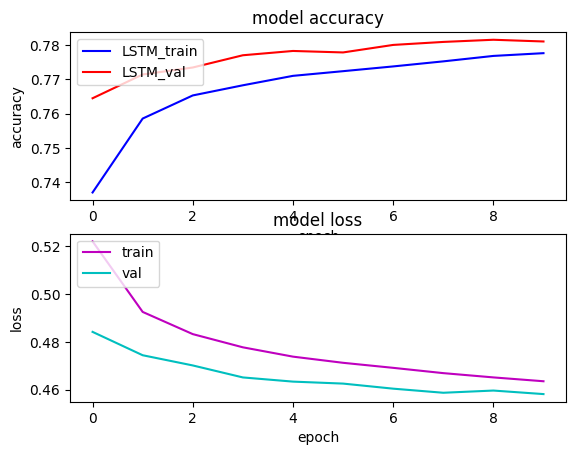

In [34]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')
al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

<div>
    <p>The above code plots the training and validation accuracy and loss of the LSTM model over the training epochs. The first subplot shows the accuracy and the second subplot shows the loss. The blue and red lines represent the training and validation accuracy respectively, while the magenta and cyan lines represent the training and validation loss respectively.</p>
</div>

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **POSITIVE** sentiment.

In [35]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"
scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 11s 323ms/step


<div>
    <p>The above code defines a function called "decode_sentiment" which takes in a score as input and returns the sentiment as a string based on a threshold of 0.5. If the score is greater than 0.5, it returns "Positive", otherwise it returns "Negative".</p>
    <p>Next, the "predict" method of the trained model is called on the test data to generate predictions on the sentiment. These predictions are then converted to a 1D array by passing each prediction score to the "decode_sentiment" function. The resulting sentiment predictions are stored in the "y_pred_1d" variable.</p>
</div>

### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [36]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

<div>
    <p>
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    </p>
    <p>
        The function takes four arguments:
    </p>
    <ul>
        <li>
            <b>cm:</b> The confusion matrix (NumPy array).
        </li>
        <li>
            <b>classes:</b> The list of class labels (strings).
        </li>
        <li>
            <b>title:</b> The title of the plot (string).
        </li>
        <li>
            <b>cmap:</b> The colormap used for the plot (Matplotlib colormap).
        </li>
    </ul>
    <p>
        The function then normalizes the confusion matrix and plots it as an image using Matplotlib.
        It sets the title, colorbar, and axis labels, and adds text to the cells indicating the values of the cells.
    </p>
</div>


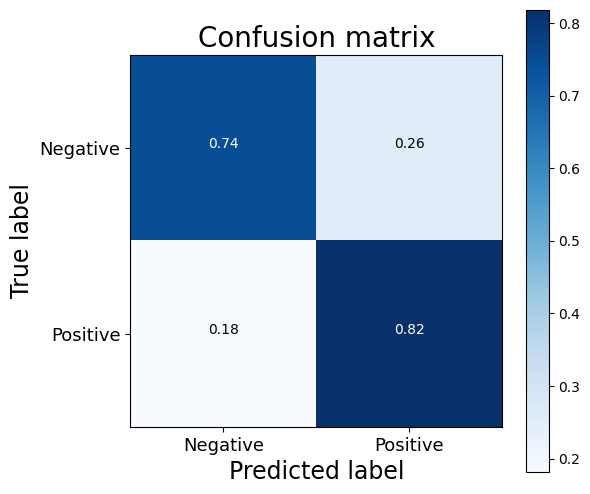

In [37]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

<ul>
    <li>The <code>confusion_matrix()</code> function from the <code>sklearn.metrics</code> library is used to create the matrix. The function takes in the actual labels and the predicted labels as inputs, and outputs the confusion matrix. The actual labels are taken from the test data and the predicted labels are generated from the model. </li>
    <li>The resulting matrix is then plotted using the <code>plot_confusion_matrix()</code> function, which takes in the confusion matrix, the unique classes in the data, and a title for the plot as inputs. </li>
    <li>Finally, the <code>plt.show()</code> function is used to display the plot. </li>
</ul>

### Classification Scores

In [38]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.80      0.74      0.77    160542
    Positive       0.76      0.82      0.79    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



<div>
  <p>The code uses the <code>classification_report()</code> function from the <code>sklearn.metrics</code> library to print the classification report for the predicted sentiment values <code>y_pred_1d</code> compared to the actual sentiment values in the test data <code>test_data.sentiment</code>.</p>
</div>

It's a pretty good model we trained here in terms of NLP. Around 80% accuracy is good enough considering the baseline human accuracy also pretty low in these tasks. Also, you may go on and explore the dataset, some tweets might have other languages than English. So our Embedding and Tokenizing wont have effect on them. But on practical scenario, this model is good for handling most tasks for Sentiment Analysis.